In [1]:


import matplotlib.pyplot as plt
import supy as sp
import pandas as pd
import numpy as np
from pathlib import Path
from night import night
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'svg'")



In [2]:

path_runcontrol = Path('baserun')/ 'RunControl_ERA5.nml'
df_state_init = sp.init_supy(path_runcontrol)
grid = df_state_init.index[0]
df_forcing = sp.load_forcing_grid(path_runcontrol, grid)

# ##### Examine Forcing data 


2020-06-25 18:34:47,714 - SuPy - INFO - All cache cleared.
2020-06-25 18:34:49,239 - SuPy - INFO - All cache cleared.


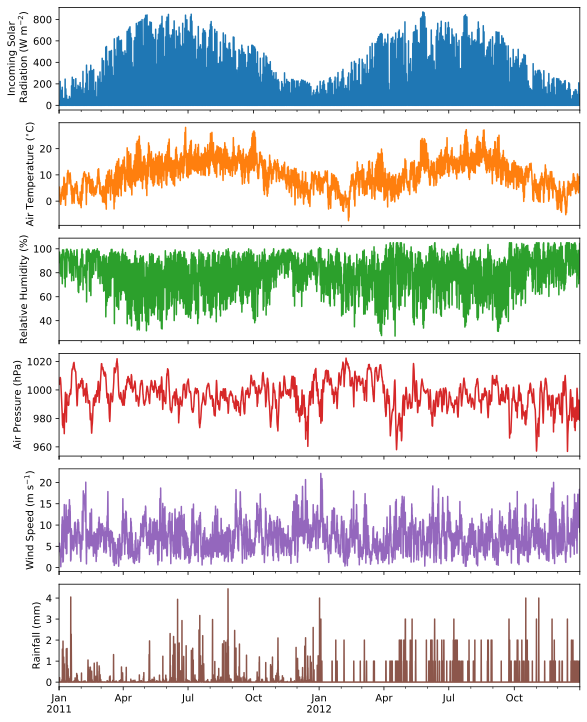

In [4]:

list_var_forcing = [
    'kdown',
    'Tair',
    'RH',
    'pres',
    'U',
    'rain',
]
dict_var_label = {
    'kdown': 'Incoming Solar\n Radiation ($ \mathrm{W \ m^{-2}}$)',
    'Tair': 'Air Temperature ($^{\circ}}$C)',
    'RH': r'Relative Humidity (%)',
    'pres': 'Air Pressure (hPa)',
    'rain': 'Rainfall (mm)',
    'U': 'Wind Speed (m $\mathrm{s^{-1}}$)'
}
df_plot_forcing_x = df_forcing.loc[:, list_var_forcing].copy().shift(
    -1).dropna(how='any')
df_plot_forcing = df_plot_forcing_x.resample('1h').mean()
df_plot_forcing['rain'] = df_plot_forcing_x['rain'].resample('1h').sum()

axes = df_plot_forcing.plot(
    subplots=True,
    figsize=(8, 12),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')
for ax, var in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[var])


# #### Three scenario Used
# 1. Initial conditions used in sample data - Used Suffix: none
# 2. Building fraction = 0. grass = .41 - Population day/night = 0 - Used Suffix: _r         ("Rural" Conditions)
# 3. Building fraction = 0.05 grass = .36 - Population day/night = 5% of initial - Used Suffix: _rb      ("Rural"conditions with Building)


In [6]:


df_state_r = df_state_init.copy()
df_state_r.loc[:, ('sfr', '(1,)')] = 0 #Building
df_state_r.loc[:, ('sfr', '(4,)')] = 0.41 #Grass
df_state_r.popdensdaytime = 0
df_state_r.popdensnighttime = 0 
sp.check_state(df_state_r)

df_state_rb = df_state_init.copy()
df_state_rb.loc[:, ('sfr', '(1,)')] = .05 #Building
df_state_rb.loc[:, ('sfr', '(4,)')] = 0.36 #Grass
df_state_rb.popdensdaytime = df_state_init.popdensdaytime * 0.05
df_state_rb.popdensnighttime = df_state_init.popdensnighttime * 0.05 
sp.check_state(df_state_rb)



2020-06-25 18:34:56,599 - SuPy - INFO - SuPy is validating `df_state`...
2020-06-25 18:34:56,770 - SuPy - INFO - All checks for `df_state` passed!
2020-06-25 18:34:56,777 - SuPy - INFO - SuPy is validating `df_state`...
2020-06-25 18:34:56,964 - SuPy - INFO - All checks for `df_state` passed!


In [8]:

# Run SuPy initial conditions
df_output, df_state_final = sp.run_supy(df_forcing, df_state_init)
df_output_suews = df_output['SUEWS']

# Run SuPy with modified environment add _r for recognition later on
df_r_output, df_state_r_final = sp.run_supy(df_forcing, df_state_r)
df_r_output_suews = df_r_output['SUEWS']
df_r_output_suews = df_r_output_suews.add_suffix('_r')

# Run SuPy with modified environment add _rb for recognition later on
df_rb_output, df_state_rb_final = sp.run_supy(df_forcing, df_state_rb)
df_rb_output_suews = df_rb_output['SUEWS']
df_rb_output_suews = df_rb_output_suews.add_suffix('_rb')



2020-06-25 18:38:00,352 - SuPy - INFO - ====================
2020-06-25 18:38:00,354 - SuPy - INFO - Simulation period:
2020-06-25 18:38:00,355 - SuPy - INFO -   Start: 2010-12-31 23:05:00
2020-06-25 18:38:00,357 - SuPy - INFO -   End: 2013-01-01 00:00:00
2020-06-25 18:38:00,358 - SuPy - INFO - 
2020-06-25 18:38:00,359 - SuPy - INFO - No. of grids: 1
2020-06-25 18:38:00,360 - SuPy - INFO - SuPy is running in serial mode
2020-06-25 18:39:00,888 - SuPy - INFO - Execution time: 60.5 s
2020-06-25 18:39:00,889 - SuPy - INFO - ====================

2020-06-25 18:39:00,954 - SuPy - INFO - ====================
2020-06-25 18:39:00,955 - SuPy - INFO - Simulation period:
2020-06-25 18:39:00,957 - SuPy - INFO -   Start: 2010-12-31 23:05:00
2020-06-25 18:39:00,958 - SuPy - INFO -   End: 2013-01-01 00:00:00
2020-06-25 18:39:00,959 - SuPy - INFO - 
2020-06-25 18:39:00,961 - SuPy - INFO - No. of grids: 1
2020-06-25 18:39:00,962 - SuPy - INFO - SuPy is running in serial mode
2020-06-25 18:40:00,895 - S

In [10]:


# RSL
df_output_rsl = df_output['RSL']
df_output_rsl_g = df_output_rsl.loc[grid]
df_output_rsl_r = df_r_output['RSL']
df_output_rsl_r = df_output_rsl_r.add_suffix('_r')
df_output_rsl_r_g = df_output_rsl_r.loc[grid]
df_output_rsl_rb = df_rb_output['RSL']
df_output_rsl_rb = df_output_rsl_rb.add_suffix('_rb')
df_output_rsl_rb_g = df_output_rsl_rb.loc[grid]



In [12]:


# Merge to one dataframe for easier plotting
df_output_suews_g = df_output_suews.loc[grid]
df_r_output_suews_g = df_r_output_suews.loc[grid]
df_rb_output_suews_g = df_rb_output_suews.loc[grid]

df_merge = pd.concat([df_output_suews_g, df_r_output_suews_g,df_rb_output_suews_g],axis=1,join='inner')
df_rsl = pd.concat([df_output_rsl_g,df_output_rsl_r_g,df_output_rsl_rb_g],axis=1,join='inner')

init_col = list(df_output_suews)
r_col = list(df_r_output_suews)
rb_col = list(df_rb_output_suews)

for i, rd, r, rbd, rb in zip(init_col,[sub + '_d' for sub in r_col],r_col,[sub + '_d' for sub in rb_col],rb_col):
    df_merge[rd] = df_merge[i] - df_merge[r]
    df_merge[rbd] = df_merge[i] - df_merge[rb]
    
# ## For closer analysis, a timespan from 20th of july to 29th of july is chosen. The period is characterised by having calm and clear days with low wind from 22-27th july


In [14]:


# Start and end date
s = '2012 7 20'
e = '2012 7 29'
size = 10, 7



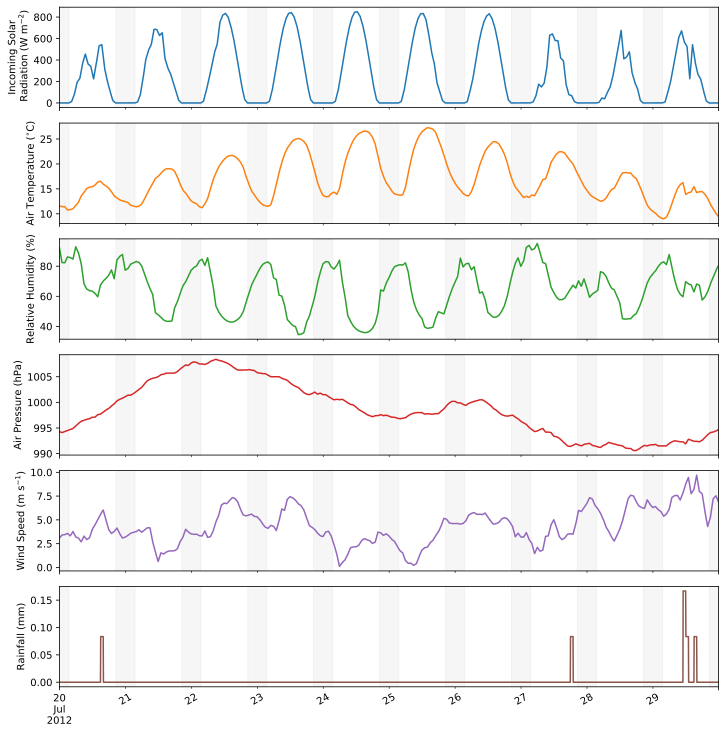

In [16]:


df_plot_forcing_x = df_forcing.loc[s:e, list_var_forcing].copy().shift(
    -1).dropna(how='any')
axes = df_plot_forcing_x.plot(
    subplots=True,
    figsize=(10, 12),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')
for ax, var in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[var])
    night(ax)



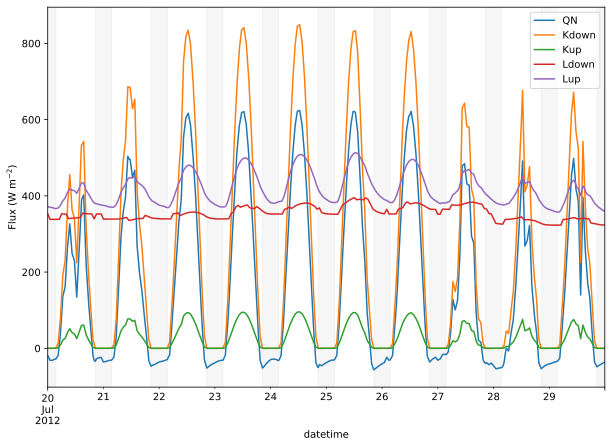

In [18]:

ax_output = df_merge.loc[s:e,['QN', 'Kdown', 'Kup', 'Ldown', 'Lup']].plot(figsize=(size))
ax_output.set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
ax_output.legend()
night(ax_output)


# ##### Temperature 2 magl


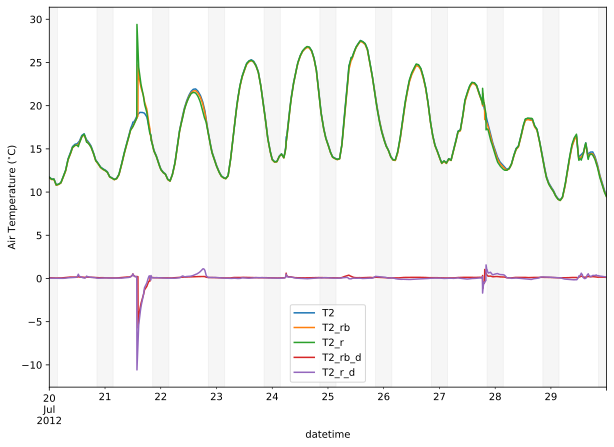

In [20]:


ax_output = df_merge.loc[s:e,['T2','T2_rb','T2_r','T2_rb_d','T2_r_d']].plot(figsize=size)
ax_output.set_ylabel('Air Temperature ($^{\\circ}}$C)')
ax_output.legend()
night(ax_output)


# ##### Relative Humidity (%)


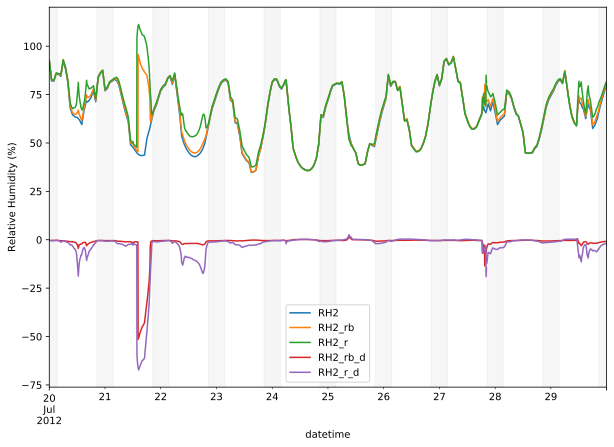

In [22]:


ax_output = df_merge.loc[s:e,['RH2','RH2_rb','RH2_r','RH2_rb_d','RH2_r_d']].plot(figsize=size)
ax_output.set_ylabel('Relative Humidity (%)')
ax_output.legend()
night(ax_output)


# ##### Specific Humidity (g/kg^-1)


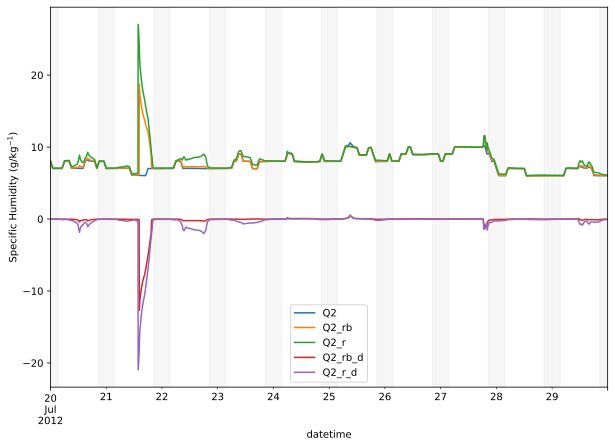

In [24]:


ax_output = df_merge.loc[s:e,['Q2','Q2_rb','Q2_r','Q2_rb_d','Q2_r_d']].plot(figsize=size)
ax_output.set_ylabel('Specific Humidity (g/$ \mathrm{kg^{-1}}$)')
ax_output.legend()
night(ax_output)


# ##### Friction Velocity


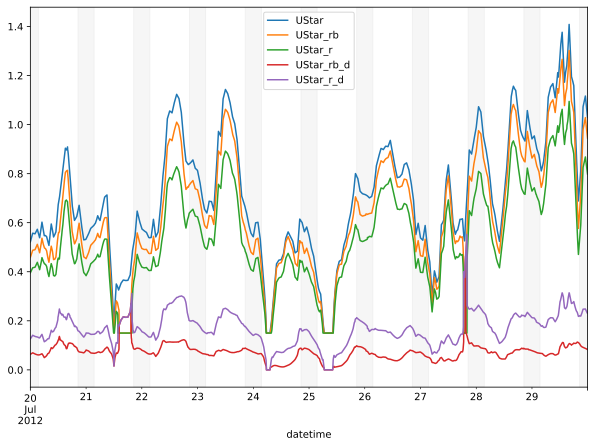

In [26]:


ax_output = df_merge.loc[s:e,['UStar','UStar_rb','UStar_r','UStar_rb_d','UStar_r_d']].plot(figsize=size)
ax_output.legend()
night(ax_output)


# ##### Resistance


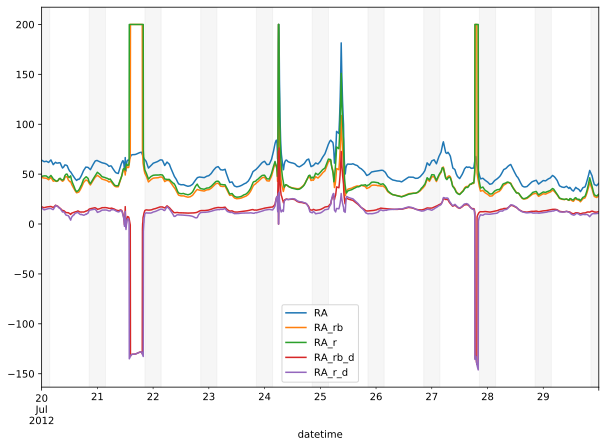

In [28]:


ax_output = df_merge.loc[s:e,['RA','RA_rb','RA_r','RA_rb_d','RA_r_d']].plot(figsize=size)
ax_output.legend()
night(ax_output)


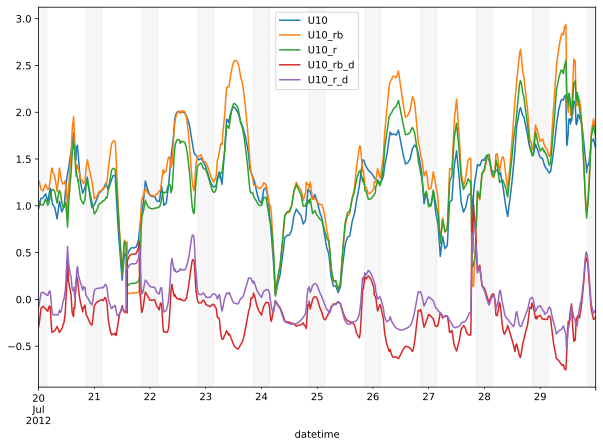

In [30]:
ax_output = df_merge.loc[s:e,['U10','U10_rb','U10_r','U10_rb_d','U10_r_d']].plot(figsize=size)
ax_output.legend()
night(ax_output)


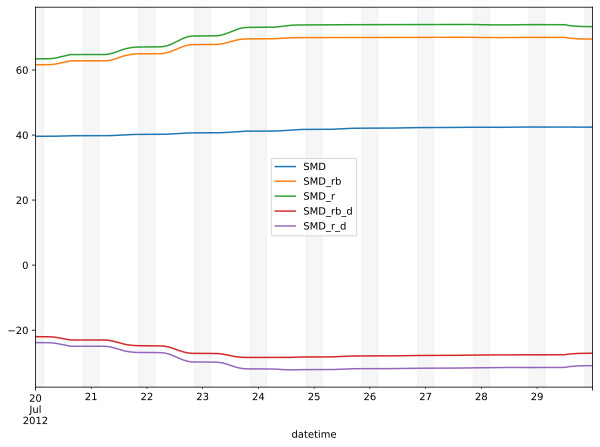

In [32]:
ax_output = df_merge.loc[s:e,['SMD','SMD_rb','SMD_r','SMD_rb_d','SMD_r_d']].plot(figsize=size)
ax_output.legend()
night(ax_output)



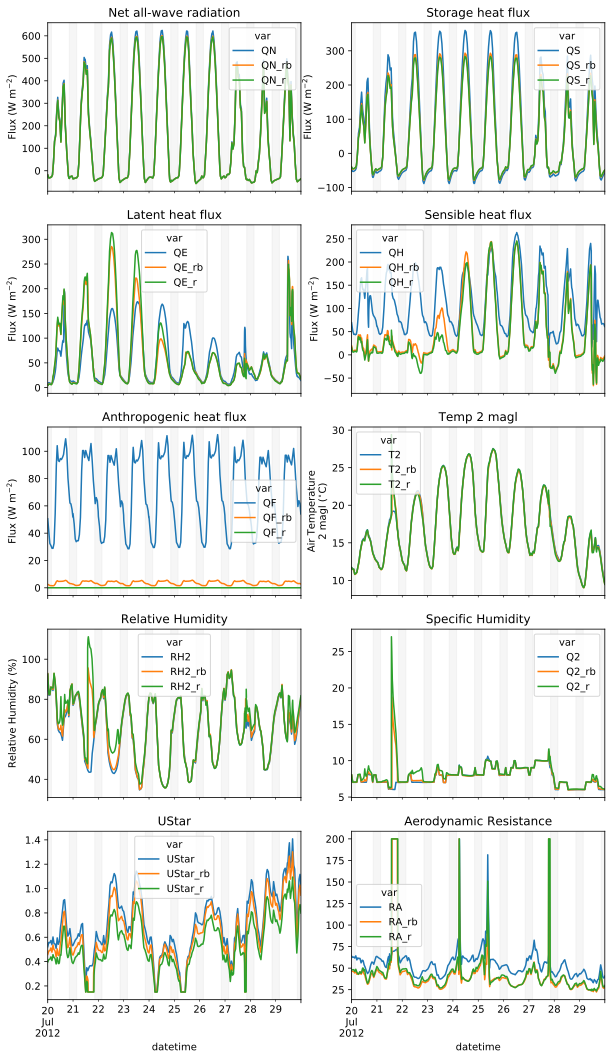

In [34]:
fsize = (10,18)
fig, axes = plt.subplots(5, 2, sharex=True)
# QN
a = df_merge.loc[s : e ,['QN','QN_rb','QN_r']].plot(ax=axes[0,0],figsize=fsize,title='Net all-wave radiation')
b = df_merge.loc[s : e ,['QS','QS_rb','QS_r']].plot(ax=axes[0,1],figsize=fsize,title='Storage heat flux',)
c = df_merge.loc[s : e ,['QE','QE_rb','QE_r']].plot(ax=axes[1,0],figsize=fsize,title='Latent heat flux')
d = df_merge.loc[s : e ,['QH','QH_rb','QH_r']].plot(ax=axes[1,1],figsize=fsize,title='Sensible heat flux')
e1 = df_merge.loc[s : e ,['QF','QF_rb','QF_r']].plot(ax=axes[2,0],figsize=fsize,title='Anthropogenic heat flux',)
f = df_merge.loc[s : e ,['T2','T2_rb','T2_r']].plot(ax=axes[2,1],figsize=fsize,title='Temp 2 magl')
g = df_merge.loc[s : e ,['RH2','RH2_rb','RH2_r']].plot(ax=axes[3,0],figsize=fsize,title='Relative Humidity')
h = df_merge.loc[s : e ,['Q2','Q2_rb','Q2_r']].plot(ax=axes[3,1],figsize=fsize,title='Specific Humidity')
i = df_merge.loc[s : e ,['UStar','UStar_rb','UStar_r']].plot(ax=axes[4,0],figsize=fsize,title='UStar')
j = df_merge.loc[s : e ,['RA','RA_rb','RA_r']].plot(ax=axes[4,1],figsize=fsize,title='Aerodynamic Resistance')
axes[0,0].set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
axes[0,1].set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
axes[1,0].set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
axes[1,1].set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
axes[2,0].set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
axes[2,1].set_ylabel('Air Temperature\n2 magl ($^{\\circ}}$C)')
axes[3,0].set_ylabel('Relative Humidity (%)')

for var in [a,b,c,d,e1,f,g,h,i,j]:
    night(var)
    

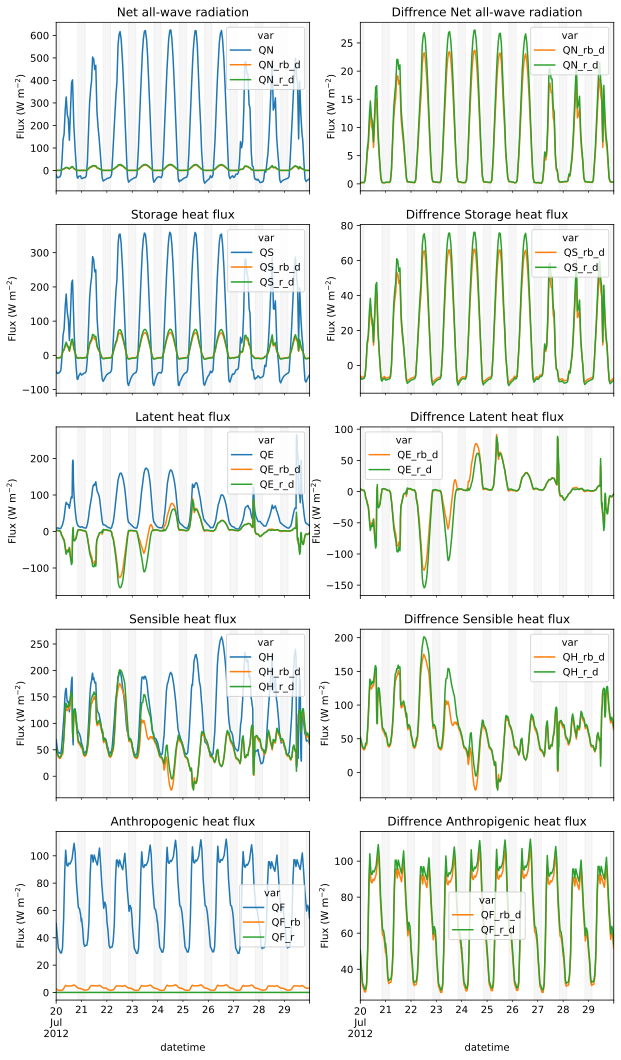

In [37]:
fig, axes = plt.subplots(5, 2, sharex=True)

a = df_merge.loc[s : e ,['QN','QN_rb_d','QN_r_d']].plot(ax=axes[0,0],figsize=fsize,title='Net all-wave radiation')
b = df_merge.loc[s : e ,['QN_rb_d','QN_r_d']].plot(ax=axes[0,1],figsize=fsize,title='Diffrence Net all-wave radiation',color=clr)
c = df_merge.loc[s : e ,['QS','QS_rb_d','QS_r_d']].plot(ax=axes[1,0],figsize=fsize,title='Storage heat flux')
d = df_merge.loc[s : e ,['QS_rb_d','QS_r_d']].plot(ax=axes[1,1],figsize=fsize,title='Diffrence Storage heat flux',color=clr)
e1 = df_merge.loc[s : e ,['QE','QE_rb_d','QE_r_d']].plot(ax=axes[2,0],figsize=fsize,title='Latent heat flux')
f = df_merge.loc[s : e ,['QE_rb_d','QE_r_d']].plot(ax=axes[2,1],figsize=fsize,title='Diffrence Latent heat flux',color=clr)
g = df_merge.loc[s : e ,['QH','QH_rb_d','QH_r_d']].plot(ax=axes[3,0],figsize=fsize,title='Sensible heat flux')
h = df_merge.loc[s : e ,['QH_rb_d','QH_r_d']].plot(ax=axes[3,1],figsize=fsize,title='Diffrence Sensible heat flux',color=clr)
i = df_merge.loc[s : e ,['QF','QF_rb','QF_r']].plot(ax=axes[4,0],figsize=fsize,title='Anthropogenic heat flux')
j = df_merge.loc[s : e ,['QF_rb_d','QF_r_d']].plot(ax=axes[4,1],figsize=fsize,title='Diffrence Anthropigenic heat flux',color=clr)

#axes[:,:].set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
for var in [a,b,c,d,e1,f,g,h,i,j]:
    night(var)
    var.set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')



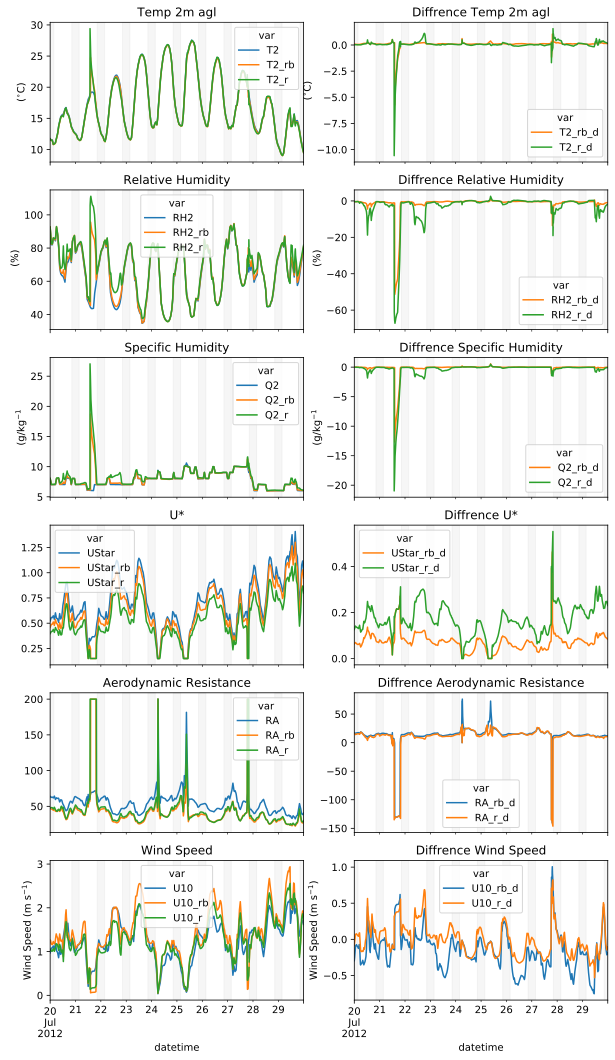

In [38]:
fig, axes = plt.subplots(6, 2, sharex=True)
k = df_merge.loc[s : e ,['T2','T2_rb','T2_r']].plot(ax=axes[0,0],figsize=fsize,title='Temp 2m agl')
l = df_merge.loc[s : e ,['T2_rb_d','T2_r_d']]\
    .plot(ax=axes[0,1],figsize=fsize,title='Diffrence Temp 2m agl',color=clr)
m = df_merge.loc[s : e ,['RH2','RH2_rb','RH2_r']]\
    .plot(ax=axes[1,0],figsize=fsize,title='Relative Humidity',)
n = df_merge.loc[s : e ,['RH2_rb_d','RH2_r_d']]\
    .plot(ax=axes[1,1],figsize=fsize,title='Diffrence Relative Humidity',color=clr)
o = df_merge.loc[s : e ,['Q2','Q2_rb','Q2_r']]\
    .plot(ax=axes[2,0],figsize=fsize,title='Specific Humidity',)
p = df_merge.loc[s : e ,['Q2_rb_d','Q2_r_d']]\
    .plot(ax=axes[2,1],figsize=fsize,title='Diffrence Specific Humidity',color=clr)
q = df_merge.loc[s : e ,['UStar','UStar_rb','UStar_r']]\
    .plot(ax=axes[3,0],figsize=fsize,title='U*',)
r = df_merge.loc[s : e ,['UStar_rb_d','UStar_r_d']]\
    .plot(ax=axes[3,1],figsize=fsize,title='Diffrence U*',color=clr)
s1 = df_merge.loc[s : e ,['RA','RA_rb','RA_r']]\
    .plot(ax=axes[4,0],figsize=fsize,title='Aerodynamic Resistance',)
t = df_merge.loc[s : e ,['RA_rb_d','RA_r_d']]\
    .plot(ax=axes[4,1],figsize=fsize,title='Diffrence Aerodynamic Resistance')
u = df_merge.loc[s : e ,['U10','U10_rb','U10_r']]\
    .plot(ax=axes[5,0],figsize=fsize,title='Wind Speed')
v = df_merge.loc[s : e ,['U10_rb_d','U10_r_d']]\
    .plot(ax=axes[5,1],figsize=fsize,title='Diffrence Wind Speed')

axes[0,0].set_ylabel('($^{\\circ}}$C)')
axes[0,1].set_ylabel(' ($^{\\circ}}$C)')
axes[1,0].set_ylabel(' (%)')
axes[1,1].set_ylabel(' (%)')
axes[2,0].set_ylabel('(g/$ \mathrm{kg^{-1}}$')
axes[2,1].set_ylabel('(g/$ \mathrm{kg^{-1}}$')
axes[3,0].set_ylabel(' ')
axes[3,1].set_ylabel(' ')
axes[4,0].set_ylabel(' ')
axes[4,1].set_ylabel(' ')
axes[5,0].set_ylabel('Wind Speed (m $\mathrm{s^{-1}}$)')
axes[5,1].set_ylabel('Wind Speed (m $\mathrm{s^{-1}}$)')

for var in [k,l,m,n,o,p,q,r,s1,t,u,v]:
    night(var)

# # Test RSL-Plot


In [39]:
s0 = '2012 07 24 00:00'
s6 = '2012 07 25 03:30'
s12= '2012 07 25 12:00'
s18= '2012 07 25 18:00'
s24= '2012 07 26 00:00'



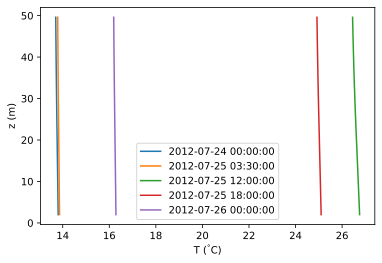

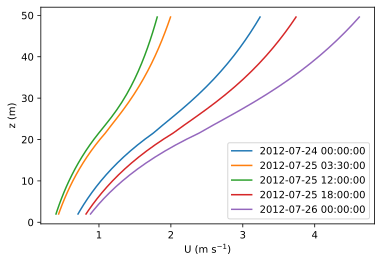

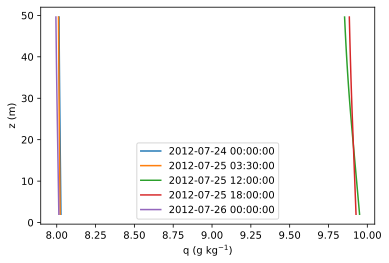

In [40]:


t0  = df_output_rsl_g.loc[s0 : s0]
t6  = df_output_rsl_g.loc[s6 : s6]
t12 = df_output_rsl_g.loc[s12:s12]
t18 = df_output_rsl_g.loc[s18:s18]
t24 = df_output_rsl_g.loc[s24:s24]
df_rsl = pd.concat([t0,t6,t12,t18,t24],join='inner')

sp.util.plot_rsl(df_rsl,'T');
sp.util.plot_rsl(df_rsl,'U');
sp.util.plot_rsl(df_rsl,'q');


# ##### Rural Conditions


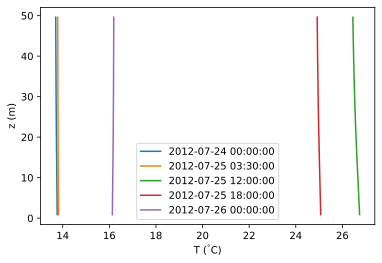

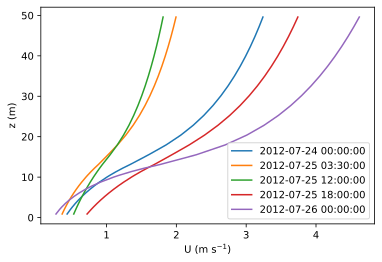

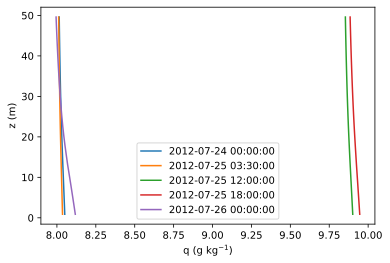

In [41]:


t0_r  = df_output_rsl_r_g.loc[s0 : s0]
t6_r  = df_output_rsl_r_g.loc[s6 : s6]
t12_r = df_output_rsl_r_g.loc[s12:s12]
t18_r = df_output_rsl_r_g.loc[s18:s18]
t24_r = df_output_rsl_r_g.loc[s24:s24]
df_rsl_r = pd.concat([t0_r,t6_r,t12_r,t18_r,t24_r],join='inner')

sp.util.plot_rsl(df_rsl_r,'T');
sp.util.plot_rsl(df_rsl_r,'U');
sp.util.plot_rsl(df_rsl_r,'q');


# ##### Rural Buildings


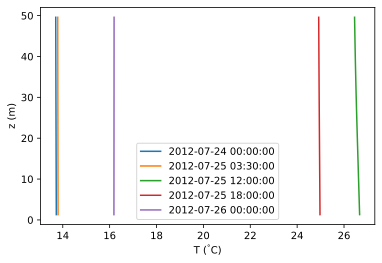

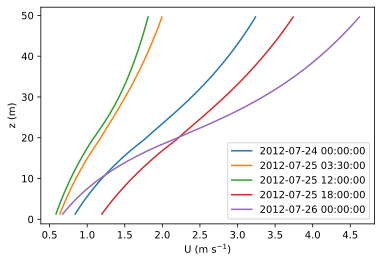

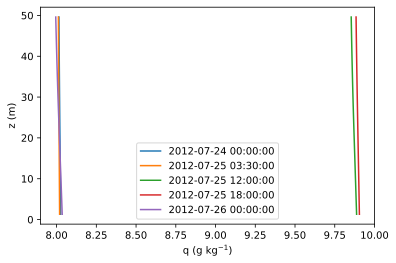

In [42]:


t0_rb  = df_output_rsl_rb_g.loc[s0 : s0]
t6_rb  = df_output_rsl_rb_g.loc[s6 : s6]
t12_rb = df_output_rsl_rb_g.loc[s12:s12]
t18_rb = df_output_rsl_rb_g.loc[s18:s18]
t24_rb = df_output_rsl_rb_g.loc[s24:s24]
df_rsl_rb = pd.concat([t0_rb,t6_rb,t12_rb,t18_rb,t24_rb],join='inner')

sp.util.plot_rsl(df_rsl_rb,'T');
sp.util.plot_rsl(df_rsl_rb,'U');
sp.util.plot_rsl(df_rsl_rb,'q');


# # Temperature 
# ##### initial
# ##### rural
# ##### ruralbuilding


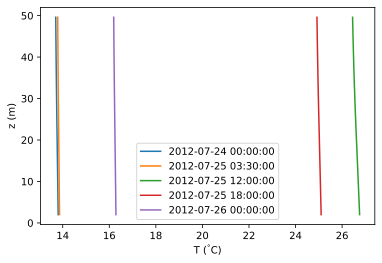

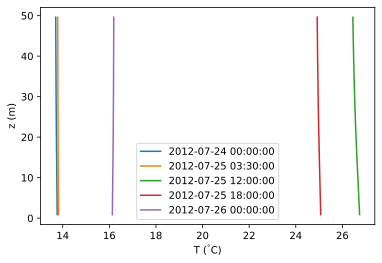

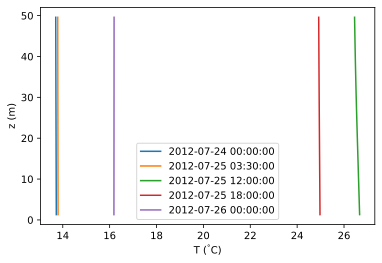

In [43]:


sp.util.plot_rsl(df_rsl,'T');
sp.util.plot_rsl(df_rsl_r,'T');
sp.util.plot_rsl(df_rsl_rb,'T');



